# Inaugural Project 2021: Housing Demand and Taxation

**Group:** SSTL

**Members:** Louise Otte Arildsen (srb330), Signe Kolind (hmk792), Stine Fürst (qvj635) & Thomas Nielsen (qzw392)

**Imports and set magics:**

In [35]:
import numpy as np
from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**We consider a model for a household looking to buy a home. The following applies for the household:**
* The household is endowed with an amount of cash, $m$, which can be spend on housing or consumption. 
* The household derives utility based on the quality, $h$, of the house, which price is determined by $p_{h}$. 
* The house is subject to progressive taxation and mortgage costs summarized by $\tau(\cdot)$.
* The objective of the household is to find the optimal division of money spend on housing and consumption in order to maximize utility. 

**Model equations:**
$$
\begin{align}
c^{\star}, h^{\star} &=\arg \max _{c, h} c^{1-\phi} h^{\phi} \\
& \text { s.t. } \\
\widetilde{p}_{h} &=p_{h} \varepsilon \\
m &=\tau\left(p_{h}, \widetilde{p}_{h}\right)+c \\
\tau\left(p_{h}, \widetilde{p}_{h}\right) &=r p_{h}+\tau^{g} \widetilde{p}_{h}+\tau^{p} \max \left\{\widetilde{p}_{h}-\bar{p}, 0\right\}
\end{align}
$$

**Explanation:** The mazimization problem of the household is to find the optimal allocation of money spend on consumption, $c$, and housing, given that the price of a house is equal to the house quality, $h$. 
Houses are taxed based on a public assesment, $\tilde{p}_{h}$, which depends on the market value of the house $p_{h}$ and a factor $\varepsilon$, which is politically set below 1. 
The household's cash endowment, $m$, is either spend on housing expenditures, $\tau\left(p_{h}, \widetilde{p}_{h}\right)$, or consumption, $c$. The housing expenditures are determined by a interest-only mortgage with interest rate, $r$, a base housing tax, $\tau^{g}$, and a progressive housing tax, $\tau^{p}$, levied on houses with a market value above the cutoff, $p$. 

By combining equation (2)-(4) and applying that $p_{h}=h$, we are able to write $c$ as a function of $h$ and thus contruct a univariate mazimization problem for the household:


$ c=m-rh-\tau^gh\varepsilon-\tau^pmax\left\{ h\varepsilon-\bar{p},0\right\} $

$c^{\star}, h^{\star} =\arg \max _{h} (m-rh-\tau^gh\varepsilon-\tau^pmax\left\{ h\varepsilon-\bar{p},0\right\})^{1-\phi} h^{\phi} $

The optimizing function used to solve the maximization problem are defined in the following code.

**Questions:**

How can we assign equation numbers in jupyterlab??


In [36]:
#a. setting parameter values:
m=0.5
phi=0.3
epsilon=0.5
r=0.03
tau_g=0.012
tau_p=0.004
p_bar=3


# utility function
def u_func(h, m, phi, epsilon, r, tau_g, tau_p, p_bar):
    c=m-r*h - tau_g*h*epsilon - tau_p*max((h*epsilon-p_bar),0)
    u = (c**(1-phi))*(h**phi)
    return u


# scalar optimiser function
def u_optimiser(m, phi, epsilon, r, tau_g, tau_p, p_bar):

    def objective(h, m, phi, epsilon, r, tau_g, tau_p, p_bar):
        return -u_func(h=h[0], m=m, phi=phi, epsilon=epsilon, r=r, tau_g=tau_g, tau_p=tau_p, p_bar=p_bar)
    
    guess = [0.5]
    Bc = lambda h: m - r*h[0] - tau_g*h[0]*epsilon - tau_p*max((h[0]*epsilon-p_bar),0)
    sol = optimize.minimize(objective,guess,bounds=[(0,np.inf)],args=(m, phi, epsilon, r, tau_g, tau_p, p_bar),constraints={'type':'ineq','fun':Bc})
        

    h_star = sol.x[0]
    c_star = m-r*h_star - tau_g*h_star*epsilon - tau_p*max(h_star*epsilon-p_bar,0)
    u_star = u_func(h=h_star,m=m, phi=phi, epsilon=epsilon, r=r, tau_g=tau_g, tau_p=tau_p, p_bar=p_bar)
    return h_star, c_star, u_star

#b. solve maximization problem 
h_star, c_star, u_star = u_optimiser(m, phi, epsilon, r, tau_g, tau_p, p_bar)

# c. print solution for optimal choice of money spend on housing and consumption
print(f'The agent will choose optimal housing = {h_star:.2f}, which implies optimal consumption = {c_star:.2f} and utility = {u_star:.2f}')

The agent will choose optimal housing = 4.16, which implies optimal consumption = 0.35 and utility = 0.74


**Question:**

How can we control than c is greater than zero?

**Comments:**

Would be nice if we wrote explanation of the functions """ """. 

# Question 2

We want to plot $c^{\star}$ and $h^{\star}$ as functions of $m$ in the range 0.4 to 1.5.

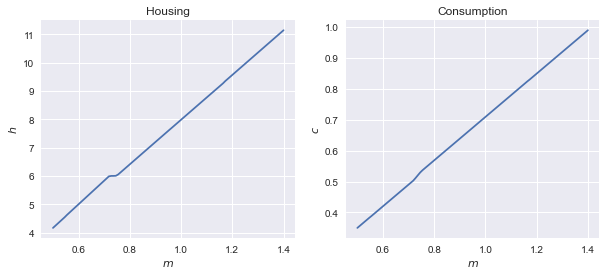

In [37]:
# a. create array of m and container for values of h and c
N=100
m = np.linspace(0.5,1.4,num=N)
h_vals = np.empty(N)
c_vals = np.empty(N)

# b. loop the optimiser over the w array
for i,mi in enumerate (m): 
    hc = u_optimiser(mi, phi, epsilon, r, tau_g, tau_p, p_bar)
    
    h_vals[i] = hc[0]
    c_vals[i] = hc[1] 

def two_figures(x_left, y_left, title_left, xlabel_left, ylabel_left, x_right, y_right, title_right, xlabel_right, ylabel_right):
    """ 
    Plots two aligned figures. 
    
    Inputs: should be self explanatory...
    Output: Two figures in 2D
    """
    # a. initialise figure
    fig = plt.figure(figsize=(10,4))# figsize is in inches...

    # b. left plot
    ax_left = fig.add_subplot(1,2,1)
    ax_left.plot(x_left,y_left)

    ax_left.set_title(title_left)
    ax_left.set_xlabel(xlabel_left)
    ax_left.set_ylabel(ylabel_left)

    # c. right plot
    ax_right = fig.add_subplot(1,2,2)

    ax_right.plot(x_right, y_right)

    ax_right.set_title(title_right)
    ax_right.set_xlabel(xlabel_right)
    ax_right.set_ylabel(ylabel_right)
    
# c. plot the figure    
two_figures(m, h_vals, "Housing", "$m$", "$h$", m, c_vals, "Consumption", "$m$", "$c$")

'Comment on the graph output'

# Question 3

We now consider $N=10000$ household looking to buy houses, but each household differ wrt. their cash endowment. The distribution of cash-on-hand is given by 

$$
m_{i} \sim \operatorname{Lognormal}(-0.4,0.35)
$$

We let the public assessment associated with the optimal housing choice of household $i$, $h_{i}^{\star}$
,be denoted $
\widetilde{p}_{h, i}^{\star}
$

$T=\sum_{i=1}^{N} \tau^{g} \widetilde{p}_{h, i}^{\star}+\tau^{p} \max \left\{\widetilde{p}_{h, i}^{\star}-\bar{p}, 0\right\}$

In the following module we calculate the average tax burden per household.

In [42]:
#a. setting parameters
size=10000
seed=1
low=-0.4
high=0.35

#b. 
def tax_revenue(seed,size,low,high,tau_g=0.012,epsilon=0.5,tau_p=0.004,p_bar=3):
    # a. set seed, draw random numbers
    np.random.seed(seed)
    mi = np.random.lognormal(low,high,size)

    # b. define local parameter values
    phi=0.3
    r=0.03 

    # c. solve each individual's optimisation problem
    tax_rev = 0

    for i, mi in enumerate (mi):        
        hc = u_optimiser(mi, phi, epsilon, r, tau_g, tau_p, p_bar)
        tax_i = tau_g*hc[0]*epsilon + tau_p*max(hc[0]*epsilon-p_bar,0)
        tax_rev += tax_i

    return tax_rev

# compute total tax revenue and average tax burden per household
total_tax_rev = tax_revenue(seed,size,low,high)
average_tax=total_tax_rev/size

print(f'The total tax revenue is {total_tax_rev:.5f}')
print(f'The average tax burden per household is {average_tax:.5f}')


The total tax revenue is 363.14180
The average tax burden per household is 0.03631


**Question:**

How can we do a sanity check?

# Question 4

We consider a reform of the tax system which changes the model parameters and we recalculate the average tax burden per household given these changes:

In [44]:
# a. updating parameters 
r_epsilon=0.8
r_tau_g=0.01
r_tau_p=0.009
r_p_bar=8

def r_tax_revenue(seed,size,low,high,r_tau_g=0.01,r_epsilon=0.8,r_tau_p=0.009,p_bar=8):
    # a. set seed, draw random numbers
    np.random.seed(seed)
    mi = np.random.lognormal(low,high,size)

    # b. define local parameter values
    phi=0.3
    r=0.03 

    # c. solve each individual's optimisation problem
    tax_rev = 0

    for i, mi in enumerate (mi):        
        hc = u_optimiser(mi, phi, r_epsilon, r, r_tau_g, r_tau_p, r_p_bar)
        tax_i = r_tau_g*hc[0]*r_epsilon + r_tau_p*max(hc[0]*r_epsilon-r_p_bar,0)
        tax_rev += tax_i

    return tax_rev

# compute total tax revenue and average tax burden per household
r_total_tax_rev = r_tax_revenue(seed,size,low,high)
r_average_tax=r_total_tax_rev/size

print(f'The total tax revenue is {r_total_tax_rev:.5f}')
print(f'The average tax burden per household is {r_average_tax:.5f}')

The total tax revenue is 450.18746
The average tax burden per household is 0.04502


# Question 5

ANSWER HERE

In [45]:
# code

# Conclusion

ADD CONCISE CONLUSION.